In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
from PIL import Image

In [3]:
image1 = Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
image2 = Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0127-0001.jpeg")
image3 = Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0158-0001.jpeg")

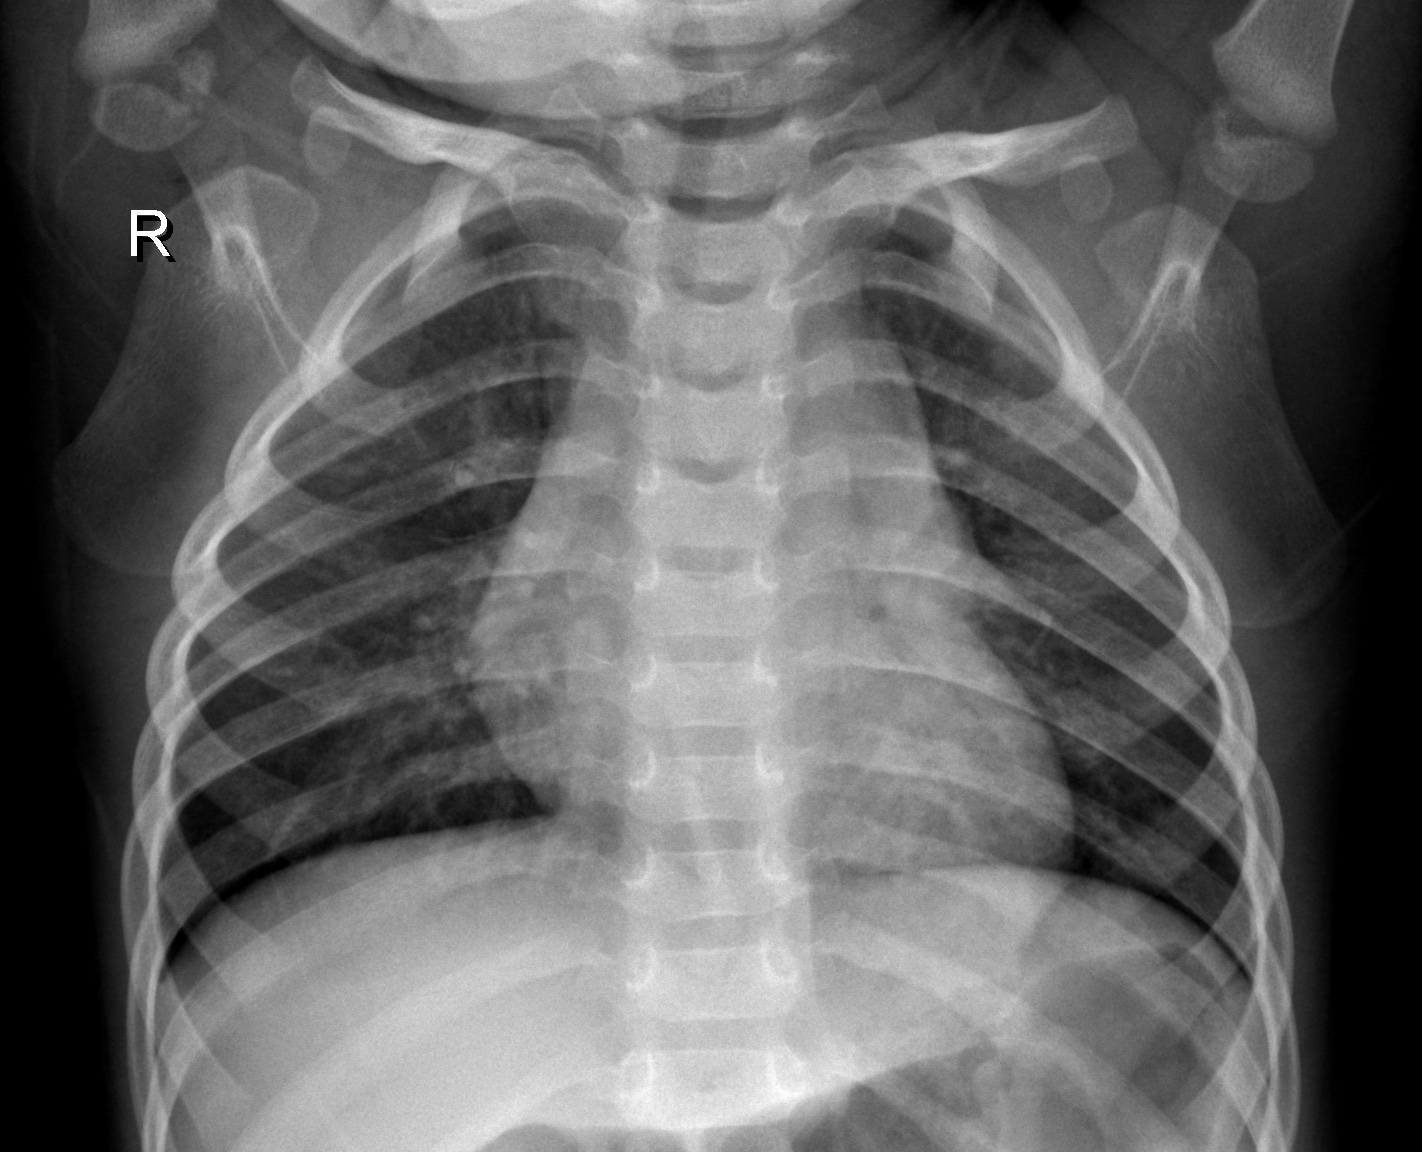

In [4]:
image1

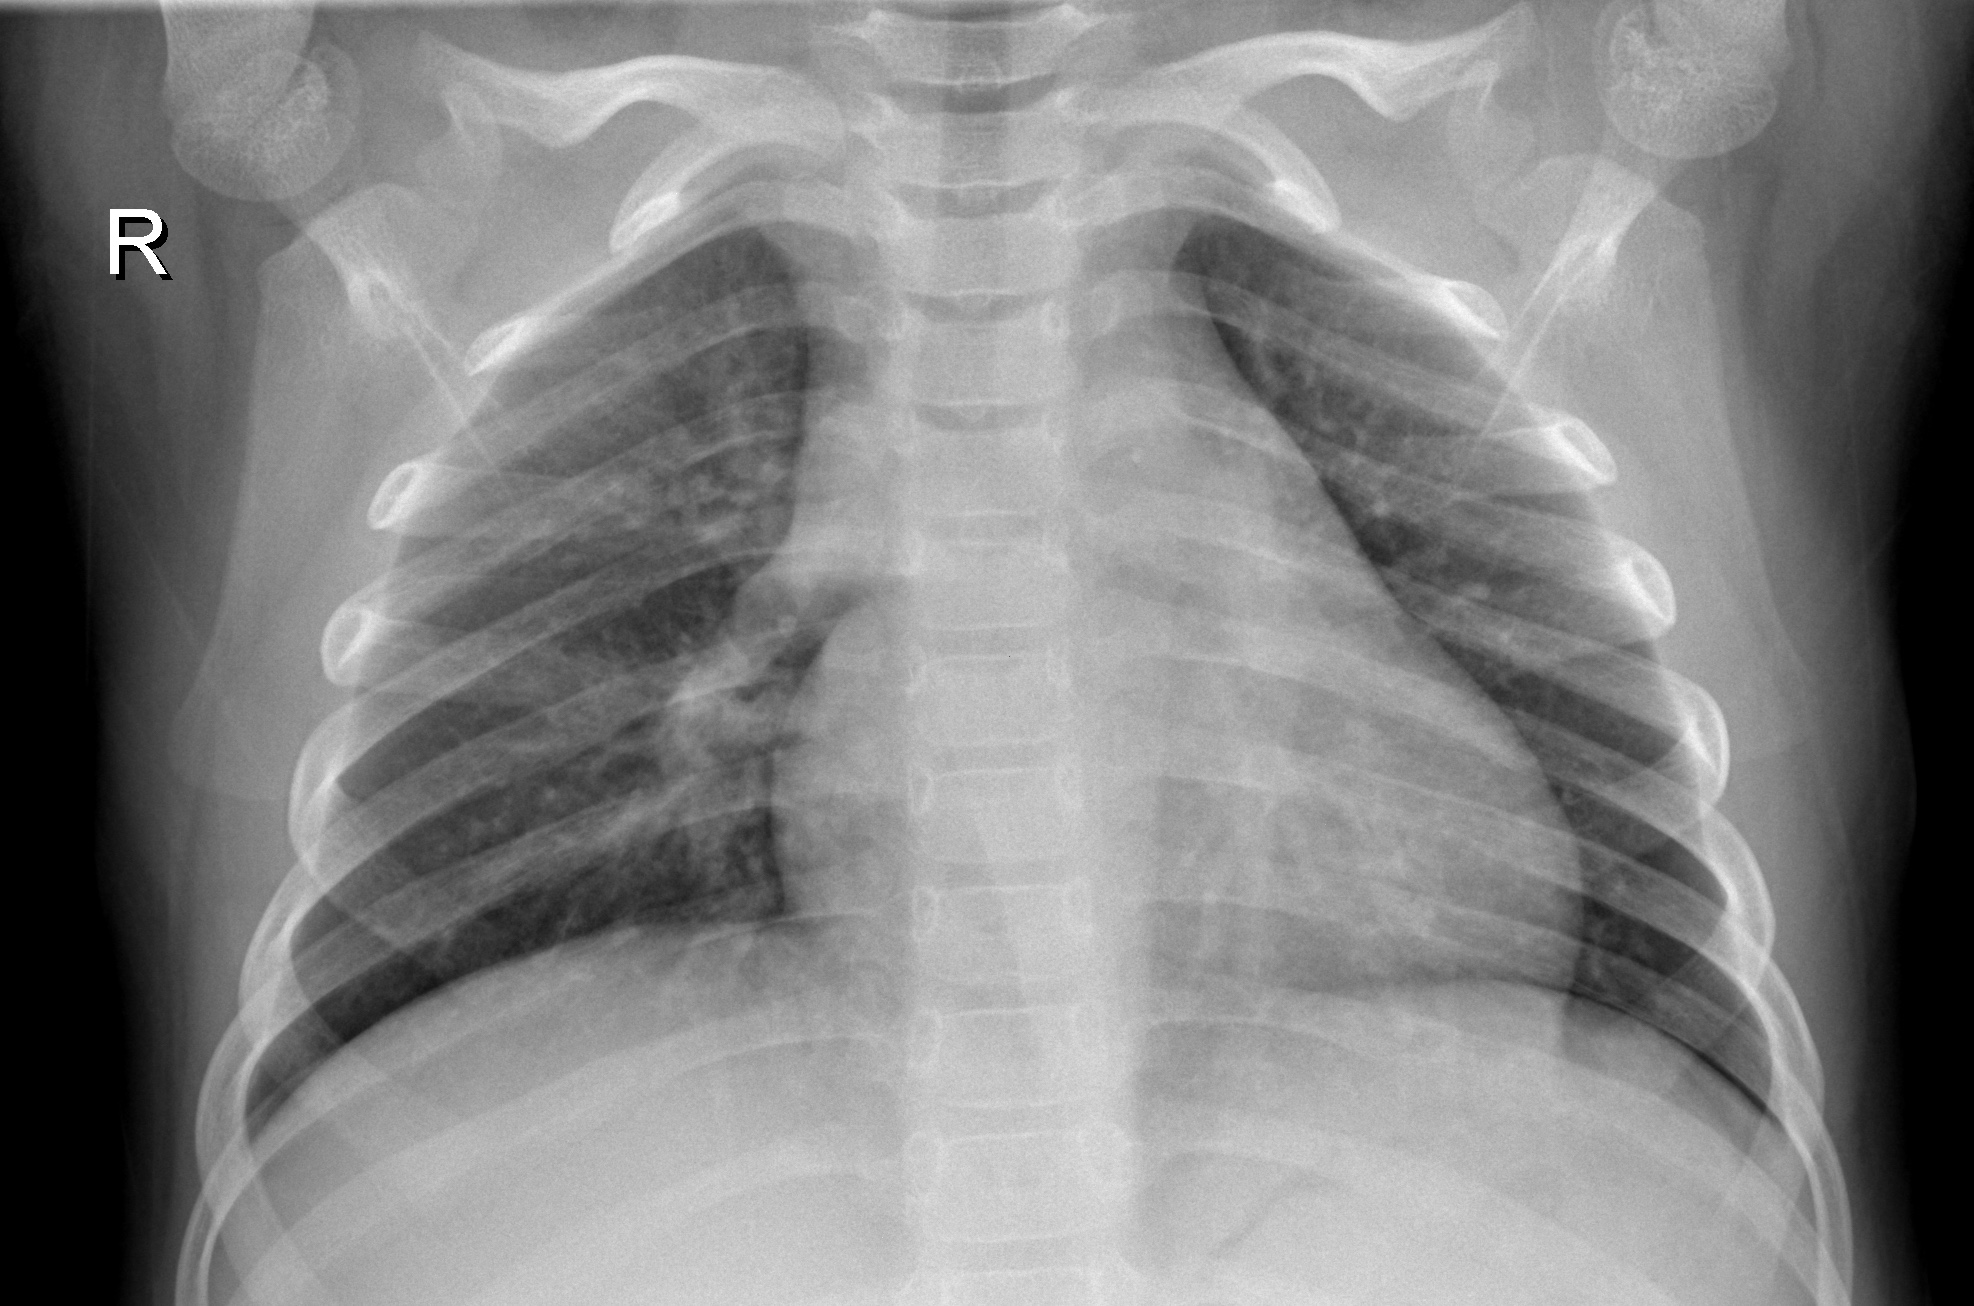

In [5]:
image2

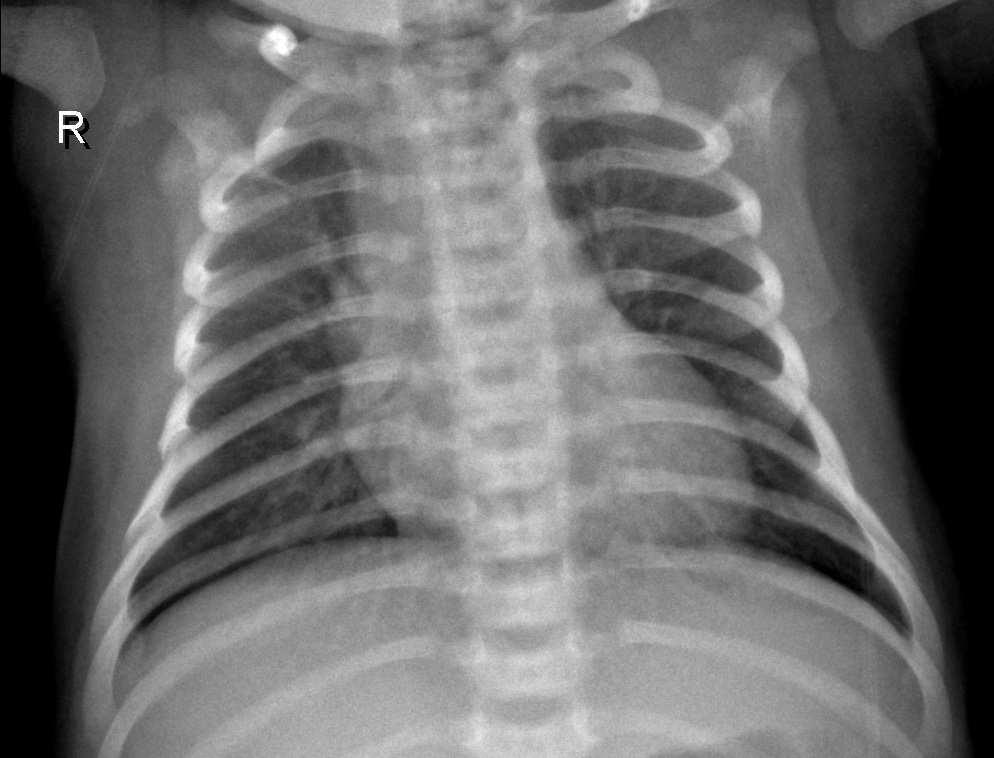

In [6]:
image3

In [7]:
image1.size, image2.size, image3.size  # Lets see the image sizes 

((1422, 1152), (1974, 1306), (994, 758))

In [8]:
mainDIR = os.listdir('/kaggle/input/chest-xray-pneumonia/')
print(mainDIR)

['chest_xray']


In [9]:
train_folder= '/kaggle/input/chest-xray-pneumonia/'
val_folder = '/kaggle/input/chest-xray-pneumonia/'
test_folder = '/kaggle/input/chest-xray-pneumonia/'

In [10]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [11]:
train_n

'/kaggle/input/chest-xray-pneumonia/NORMAL/'

In [12]:
from pathlib import Path

In [13]:
train_dir = Path("/kaggle/input/chest-xray-pneumonia/chest_xray/train")
test_dir = Path("/kaggle/input/chest-xray-pneumonia/chest_xray/test")
valid_dir = Path("/kaggle/input/chest-xray-pneumonia/chest_xray/test")

train_files = list(train_dir.glob("*/*"))
test_files = list(test_dir.glob("*/*"))
valid_files = list(valid_dir.glob("*/*"))

print(f"Images train set: {len(train_files)}")
print(f"Images test set: {len(test_files)}")
print(f"Images valid set: {len(valid_files)}")

Images train set: 5216
Images test set: 624
Images valid set: 624


In [14]:
import tensorflow as tf

In [15]:
train_dataset =tf.keras.utils.image_dataset_from_directory(
                                                            train_dir,
                                                            labels='inferred',
                                                            label_mode='int',
                                                            class_names=None,
                                                            color_mode='rgb',
                                                            batch_size=32,
                                                            image_size=(256, 256),
                                                            shuffle=True,
                                                            seed=None,
                                                            validation_split=None,
                                                            subset=None,
                                                            interpolation='bilinear',
                                                            follow_links=False,
                                                            crop_to_aspect_ratio=False,
)

train_dataset

Found 5216 files belonging to 2 classes.


2023-01-21 09:35:54.756416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 09:35:54.854619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 09:35:54.855476: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 09:35:54.859178: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
                                                            test_dir,
                                                            labels='inferred',
                                                            label_mode='int',
                                                            class_names=None,
                                                            color_mode='rgb',
                                                            batch_size=32,
                                                            image_size=(256, 256),
                                                            shuffle=True,
                                                            seed=None,
                                                            validation_split=None,
                                                            subset=None,
                                                            interpolation='bilinear',
                                                            follow_links=False,
                                                            crop_to_aspect_ratio=False,
)

test_dataset

Found 624 files belonging to 2 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [17]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dropout(0.2))
#model.add(Dense(64, activation ="relu"))
#model.add(Dense(128, activation ="relu"))
#model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(1, activation ="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                3

In [19]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [20]:
history = model.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 10, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

Epoch 1/10


2023-01-21 09:35:58.261849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-21 09:36:01.517855: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 49s 241ms/step - loss: 3.0969 - accuracy: 0.8591 - val_loss: 0.9691 - val_accuracy: 0.7949
Epoch 2/10
163/163 [==============================] - 31s 180ms/step - loss: 0.3439 - accuracy: 0.9103 - val_loss: 1.4395 - val_accuracy: 0.7596
Epoch 3/10
163/163 [==============================] - 31s 182ms/step - loss: 0.2018 - accuracy: 0.9258 - val_loss: 1.5169 - val_accuracy: 0.7212
Epoch 4/10
163/163 [==============================] - 31s 183ms/step - loss: 0.1299 - accuracy: 0.9548 - val_loss: 2.4670 - val_accuracy: 0.7131
Epoch 5/10
163/163 [==============================] - 29s 173ms/step - loss: 0.1028 - accuracy: 0.9630 - val_loss: 2.6327 - val_accuracy: 0.7163
Epoch 6/10
163/163 [==============================] - 30s 178ms/step - loss: 0.0792 - accuracy: 0.9728 - val_loss: 2.6008 - val_accuracy: 0.7452
Epoch 7/10
163/163 [==============================] - 30s 177ms/step - loss: 0.0636 - accuracy: 0.9776 - val_loss: 3.1106 - val_accuracy: 0.7